In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from tensorflow.keras import layers,models
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import mobilenet_v2

In [2]:
data="../Downloads/archive/NA_Fish_Dataset"

In [3]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

In [4]:
train_images = train_gen.flow_from_directory(
    directory=data,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

Found 344 images belonging to 9 classes.


In [5]:
val_images = train_gen.flow_from_directory(
    directory=data,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 86 images belonging to 9 classes.


In [6]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

2021-10-04 14:05:33.948843: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-04 14:05:33.949223: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


9412608/9406464 [==============================] - 1s 0us/step


In [7]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(9, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [8]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

2021-10-04 14:05:53.874284: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 9 of 11
2021-10-04 14:05:56.240853: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Train for 11 steps, validate for 3 steps
Epoch 1/20


2021-10-04 14:06:20.989041: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 6 of 11
2021-10-04 14:06:28.309871: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


11/11 [==============================] - 64s 6s/step - loss: 1.5193 - accuracy: 0.5262 - val_loss: 1.2848 - val_accuracy: 0.5581
Epoch 2/20


2021-10-04 14:07:17.664611: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 10 of 11
2021-10-04 14:07:18.452619: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


11/11 [==============================] - 42s 4s/step - loss: 0.3361 - accuracy: 0.9477 - val_loss: 1.0233 - val_accuracy: 0.6744
Epoch 3/20


2021-10-04 14:07:59.646162: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 10 of 11
2021-10-04 14:08:00.420305: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


11/11 [==============================] - 42s 4s/step - loss: 0.0883 - accuracy: 1.0000 - val_loss: 0.8713 - val_accuracy: 0.7558
Epoch 4/20


2021-10-04 14:08:41.221560: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 10 of 11
2021-10-04 14:08:41.992848: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


11/11 [==============================] - 41s 4s/step - loss: 0.0382 - accuracy: 1.0000 - val_loss: 0.9336 - val_accuracy: 0.7558
Epoch 5/20


2021-10-04 14:09:22.742558: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 10 of 11
2021-10-04 14:09:23.524848: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


11/11 [==============================] - 46s 4s/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 0.9216 - val_accuracy: 0.7442
Epoch 6/20


2021-10-04 14:10:08.965923: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 9 of 11
2021-10-04 14:10:11.157779: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


11/11 [==============================] - 46s 4s/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.9782 - val_accuracy: 0.7442


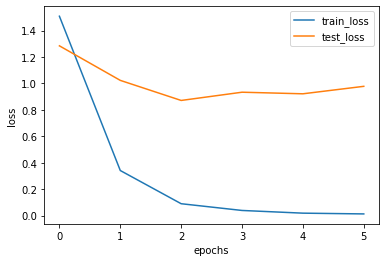

In [9]:
plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="test_loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

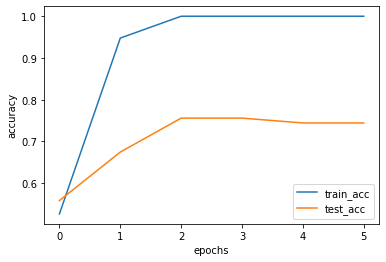

In [10]:
plt.plot(history.history["accuracy"],label="train_acc")
plt.plot(history.history["val_accuracy"],label="test_acc")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()